## 🧾 Executive summary
1. Atlas Lab has hired 1217 employees since 2013 and 224 employees had left the company. Currently, there are 933 active employees and the average age of the employees in the company is around 30 years old, which is considered relatively young.

2. The total attrition rate for the company from 2013 to 2022 is 18.41% and Sales Department has the highest attrition rate of 24.18%, followed by Human Resources (HR) department and Technology department which had 22.64% and 15.50% attrition rate, respectively. However, the attrition rate has been decreasing since Year 2013 from a high rate of 84.38% to 19.77% on Year 2022.

3. From year 2013 to 2022, employees between the age 18 to 31 has the highest attrition rate of around 24%. Within this age range, employees with Doctorate or Masters education level are getting lesser salary compared to High School graduates in Sales and HR department.

4. Data Scientists, Sales Executives, Software Engineers, and Sales Representatives quit the job is likely due to working over time requirement. Out of 88 sales department employees who have left the company, 47 employees required to work over time. Out of 12 HR department employees who have left the company, 5 employees required to work over time. Due to the need to work over time, employees are 50% likely to take up training opportunities.

5. Recommended actions to reduce attrition:

    - Increase the salary of employees who have high education level in Sales and HR department.
    - Allows hybrid working to improve work life balance, especially for employees who are married.
    - Reduce the workload on job roles that often need to work over time.
    - Encourage employees to enrol in training courses for upgrading their skillsets.

## 📷 Tableau screenshot
![Executive Summary.png](<attachment:Executive Summary.png>)
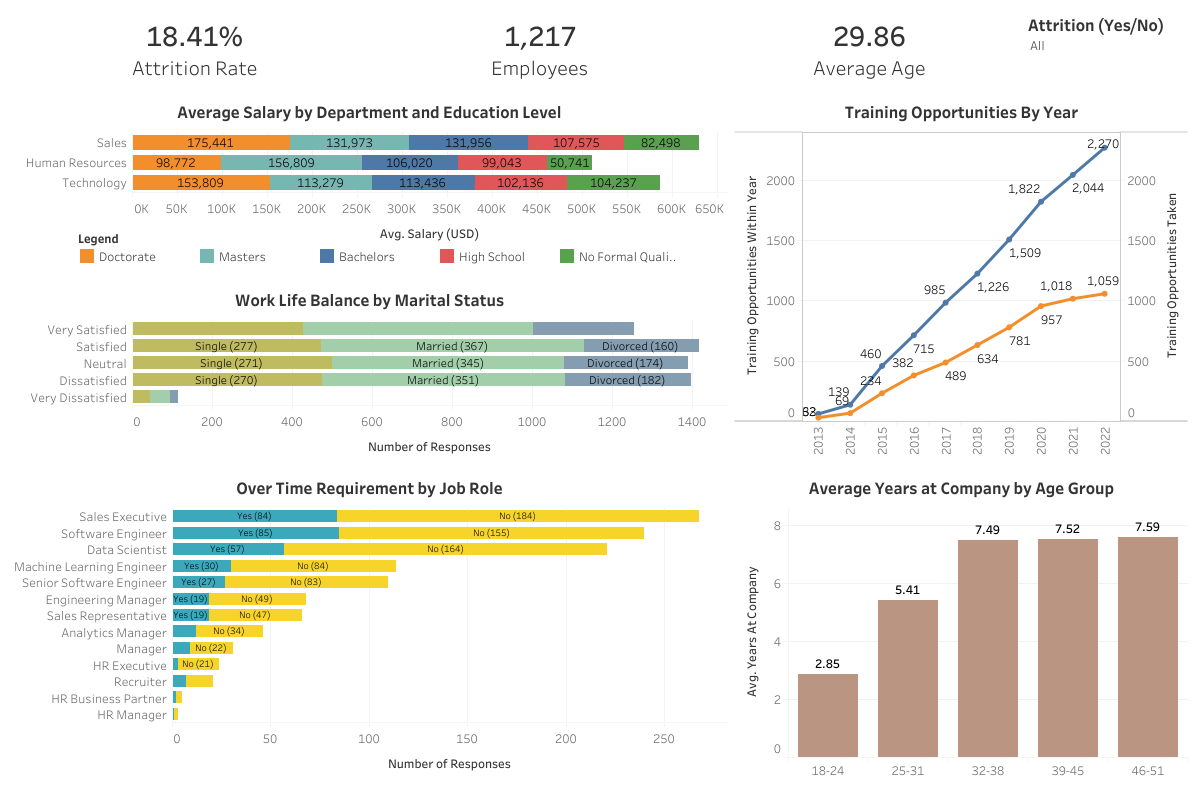

## 🌐 Link to your Tableau Public dashboard
https://public.tableau.com/views/HRAnalytics_16845123839020/ExecutiveSummary?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# **Data Cleaning**

In [1]:
import pandas as pd

el_df = pd.read_csv("data/education_level.csv")
em_df = pd.read_csv("data/employee.csv", parse_dates=['HireDate'])
pr_df = pd.read_csv("data/performance_rating.csv", delimiter=';', parse_dates=['ReviewDate'])

In [2]:
em_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1470 non-null   object        
 1   FirstName                1470 non-null   object        
 2   LastName                 1470 non-null   object        
 3   Gender                   1470 non-null   object        
 4   Age                      1470 non-null   int64         
 5   BusinessTravel           1470 non-null   object        
 6   Department               1470 non-null   object        
 7   DistanceFromHome (KM)    1470 non-null   int64         
 8   State                    1470 non-null   object        
 9   Ethnicity                1470 non-null   object        
 10  Education                1470 non-null   int64         
 11  EducationField           1470 non-null   object        
 12  JobRole                  1470 non-

In [3]:
em_df.nunique()

EmployeeID                 1468
FirstName                  1334
LastName                   1441
Gender                        4
Age                          34
BusinessTravel                3
Department                    3
DistanceFromHome (KM)        45
State                         3
Ethnicity                     7
Education                     5
EducationField                8
JobRole                      13
MaritalStatus                 3
Salary                     1455
StockOptionLevel              4
OverTime                      2
HireDate                   1192
Attrition                     2
YearsAtCompany               11
YearsInMostRecentRole        11
YearsSinceLastPromotion      11
YearsWithCurrManager         11
dtype: int64

In [4]:
em_duplicate = em_df[em_df.duplicated("EmployeeID", keep=False)]
em_duplicate

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
545,0.00E+00,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6
667,0.00E+00,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4
1172,0.00E+00,Pepi,Clift,Female,21,Some Travel,Technology,39,NY,White,2,Information Systems,Machine Learning Engineer,Single,63201,0,No,2020-12-13,No,2,2,2,2


In [5]:
df1 = em_df.merge(el_df, left_on="Education", right_on="EducationLevelID")
df1.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate
1,C0C7-A3EF,Hagen,Worge,Male,48,No Travel,Sales,9,CA,White,5,Economics,Sales Executive,Single,125587,0,No,2012-02-12,No,10,10,10,4,5,Doctorate
2,3F19-FC5A,Hy,Trevance,Male,35,Some Travel,Sales,29,NY,White,5,Marketing,Sales Executive,Divorced,182764,2,Yes,2012-03-10,No,10,7,9,9,5,Doctorate
3,A2FB-2D5D,Lebbie,Poure,Female,43,Some Travel,Technology,11,CA,White,5,Information Systems,Analytics Manager,Married,482510,1,No,2012-03-17,No,10,9,9,1,5,Doctorate
4,DEBE-1622,Bartolemo,Balma,Male,28,Frequent Traveller,Technology,22,CA,White,5,Computer Science,Machine Learning Engineer,Single,205433,0,No,2012-04-02,Yes,4,1,2,1,5,Doctorate


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1470 non-null   object        
 1   FirstName                1470 non-null   object        
 2   LastName                 1470 non-null   object        
 3   Gender                   1470 non-null   object        
 4   Age                      1470 non-null   int64         
 5   BusinessTravel           1470 non-null   object        
 6   Department               1470 non-null   object        
 7   DistanceFromHome (KM)    1470 non-null   int64         
 8   State                    1470 non-null   object        
 9   Ethnicity                1470 non-null   object        
 10  Education                1470 non-null   int64         
 11  EducationField           1470 non-null   object        
 12  JobRole                  1470 non-

In [7]:
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   PerformanceID                    6709 non-null   object        
 1   EmployeeID                       6709 non-null   object        
 2   ReviewDate                       6709 non-null   datetime64[ns]
 3   EnvironmentSatisfaction          6709 non-null   object        
 4   JobSatisfaction                  6709 non-null   object        
 5   RelationshipSatisfaction         6709 non-null   object        
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64         
 7   TrainingOpportunitiesTaken       6709 non-null   int64         
 8   WorkLifeBalance                  6709 non-null   object        
 9   SelfRating                       6709 non-null   object        
 10  ManagerRating                    6709 non-null   object     

In [8]:
pr_df.nunique()

PerformanceID                      6709
EmployeeID                         1278
ReviewDate                         2771
EnvironmentSatisfaction               5
JobSatisfaction                       5
RelationshipSatisfaction              5
TrainingOpportunitiesWithinYear       3
TrainingOpportunitiesTaken            4
WorkLifeBalance                       5
SelfRating                            3
ManagerRating                         5
dtype: int64

In [9]:
pr_df.sort_values(by='ReviewDate',ascending=False)
pr_df

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,2013-01-02,Very Satisfied,Satisfied,Very Satisfied,1,0,Satisfied,Exceeds Expectation,Exceeds Expectation
1,PR02,B61E-0F26,2013-01-03,Very Satisfied,Satisfied,Satisfied,1,3,Satisfied,Exceeds Expectation,Meets Expectation
2,PR03,F5E3-48BB,2013-01-03,Neutral,Satisfied,Very Satisfied,3,2,Neutral,Above and Beyond,Exceeds Expectation
3,PR04,0678-748A,2013-01-04,Very Satisfied,Neutral,Dissatisfied,2,0,Dissatisfied,Meets Expectation,Needs Improvement
4,PR05,541F-3E19,2013-01-04,Very Satisfied,Dissatisfied,Neutral,1,0,Satisfied,Exceeds Expectation,Meets Expectation
...,...,...,...,...,...,...,...,...,...,...,...
6704,PR995,4F28-CFAF,2016-03-14,Very Satisfied,Neutral,Neutral,3,1,Very Satisfied,Above and Beyond,Exceeds Expectation
6705,PR996,7C80-94E0,2016-03-14,Neutral,Very Satisfied,Satisfied,2,1,Neutral,Exceeds Expectation,Exceeds Expectation
6706,PR997,8233-2483,2016-03-14,Neutral,Satisfied,Dissatisfied,3,1,Dissatisfied,Meets Expectation,Needs Improvement
6707,PR998,8A5B-3D6E,2016-03-15,Very Satisfied,Dissatisfied,Very Satisfied,2,2,Satisfied,Meets Expectation,Meets Expectation


In [10]:
df2 = df1.merge(pr_df, on="EmployeeID")
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6729 entries, 0 to 6728
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6729 non-null   object        
 1   FirstName                        6729 non-null   object        
 2   LastName                         6729 non-null   object        
 3   Gender                           6729 non-null   object        
 4   Age                              6729 non-null   int64         
 5   BusinessTravel                   6729 non-null   object        
 6   Department                       6729 non-null   object        
 7   DistanceFromHome (KM)            6729 non-null   int64         
 8   State                            6729 non-null   object        
 9   Ethnicity                        6729 non-null   object        
 10  Education                        6729 non-null   int64      

In [11]:
df2.sort_values(by='ReviewDate',ascending=False)
df2

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR1295,2016-10-30,Neutral,Neutral,Dissatisfied,3,0,Satisfied,Meets Expectation,Meets Expectation
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR1908,2017-10-30,Satisfied,Satisfied,Very Satisfied,3,1,Dissatisfied,Meets Expectation,Needs Improvement
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR2617,2018-10-30,Very Satisfied,Very Satisfied,Satisfied,3,0,Satisfied,Above and Beyond,Above and Beyond
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR3436,2019-10-30,Very Dissatisfied,Neutral,Dissatisfied,3,1,Neutral,Above and Beyond,Exceeds Expectation
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR411,2014-10-31,Neutral,Satisfied,Dissatisfied,1,0,Neutral,Exceeds Expectation,Meets Expectation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6724,00E4-3D60,Sherilyn,Girke,Female,30,Frequent Traveller,Technology,37,CA,White,1,Business Studies,Data Scientist,Single,109778,0,No,2022-06-23,Yes,0,0,0,0,1,No Formal Qualifications,PR2959,2019-03-29,Very Satisfied,Very Satisfied,Very Satisfied,2,2,Satisfied,Exceeds Expectation,Exceeds Expectation
6725,00E4-3D60,Sherilyn,Girke,Female,30,Frequent Traveller,Technology,37,CA,White,1,Business Studies,Data Scientist,Single,109778,0,No,2022-06-23,Yes,0,0,0,0,1,No Formal Qualifications,PR3824,2020-03-28,Very Satisfied,Satisfied,Very Satisfied,3,0,Neutral,Exceeds Expectation,Meets Expectation
6726,00E4-3D60,Sherilyn,Girke,Female,30,Frequent Traveller,Technology,37,CA,White,1,Business Studies,Data Scientist,Single,109778,0,No,2022-06-23,Yes,0,0,0,0,1,No Formal Qualifications,PR4813,2021-03-28,Very Satisfied,Neutral,Neutral,3,0,Neutral,Exceeds Expectation,Meets Expectation
6727,00E4-3D60,Sherilyn,Girke,Female,30,Frequent Traveller,Technology,37,CA,White,1,Business Studies,Data Scientist,Single,109778,0,No,2022-06-23,Yes,0,0,0,0,1,No Formal Qualifications,PR584,2015-03-30,Neutral,Dissatisfied,Satisfied,1,0,Very Satisfied,Exceeds Expectation,Exceeds Expectation


Delete rows that ReviewDate is before HireDate

In [12]:
df2['HireDate'] = pd.to_datetime(df2['HireDate'])
df2['ReviewDate'] = pd.to_datetime(df2['ReviewDate'])
df3 = df2[df2['HireDate'] <= df2['ReviewDate']]
df3

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR1295,2016-10-30,Neutral,Neutral,Dissatisfied,3,0,Satisfied,Meets Expectation,Meets Expectation
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR1908,2017-10-30,Satisfied,Satisfied,Very Satisfied,3,1,Dissatisfied,Meets Expectation,Needs Improvement
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR2617,2018-10-30,Very Satisfied,Very Satisfied,Satisfied,3,0,Satisfied,Above and Beyond,Above and Beyond
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR3436,2019-10-30,Very Dissatisfied,Neutral,Dissatisfied,3,1,Neutral,Above and Beyond,Exceeds Expectation
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR411,2014-10-31,Neutral,Satisfied,Dissatisfied,1,0,Neutral,Exceeds Expectation,Meets Expectation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,20BA-5868,Mallissa,Buzine,Non-Binary,19,Some Travel,Sales,29,CA,White,1,Marketing,Sales Representative,Single,29673,1,No,2021-03-27,Yes,0,0,0,0,1,No Formal Qualifications,PR5664,2022-01-22,Neutral,Neutral,Very Satisfied,1,2,Dissatisfied,Above and Beyond,Above and Beyond
6698,217C-7180,Hale,Patty,Male,20,Some Travel,Technology,27,IL,White,1,Business Studies,Data Scientist,Single,27141,0,No,2021-05-15,No,1,1,1,1,1,No Formal Qualifications,PR6151,2022-06-13,Very Satisfied,Dissatisfied,Very Satisfied,1,0,Very Satisfied,Meets Expectation,Meets Expectation
6706,AFDF-3DA8,Mikkel,Fosdyke,Male,41,Some Travel,Sales,35,NY,White,1,Marketing,Manager,Married,314961,1,No,2021-05-23,Yes,0,0,0,0,1,No Formal Qualifications,PR5442,2021-11-07,Satisfied,Very Satisfied,Dissatisfied,3,1,Dissatisfied,Above and Beyond,Above and Beyond
6707,AFDF-3DA8,Mikkel,Fosdyke,Male,41,Some Travel,Sales,35,NY,White,1,Marketing,Manager,Married,314961,1,No,2021-05-23,Yes,0,0,0,0,1,No Formal Qualifications,PR6555,2022-11-07,Very Satisfied,Neutral,Very Satisfied,2,1,Neutral,Meets Expectation,Meets Expectation


In [13]:
df3.nunique()

EmployeeID                         1215
FirstName                          1122
LastName                           1197
Gender                                4
Age                                  34
BusinessTravel                        3
Department                            3
DistanceFromHome (KM)                45
State                                 3
Ethnicity                             7
Education                             5
EducationField                        8
JobRole                              13
MaritalStatus                         3
Salary                             1208
StockOptionLevel                      4
OverTime                              2
HireDate                            998
Attrition                             2
YearsAtCompany                       11
YearsInMostRecentRole                11
YearsSinceLastPromotion              11
YearsWithCurrManager                 11
EducationLevelID                      5
EducationLevel                        5


In [14]:
em_df['EmployeeID']

0       3012-1A41
1       CBCB-9C9D
2       95D7-1CE9
3       47A0-559B
4       42CC-040A
          ...    
1465    467E-977A
1466    6FB9-A624
1467    EBF4-5928
1468    60E6-B1D9
1469    84D4-D4C3
Name: EmployeeID, Length: 1470, dtype: object

In [15]:
print(em_df[~em_df['EmployeeID'].isin(df3['EmployeeID'])])

     EmployeeID FirstName  ... YearsSinceLastPromotion YearsWithCurrManager
702   1A6D-AF5D     Clair  ...                       4                    1
712   7EEF-9A90    Sheryl  ...                       5                    3
715   D24B-5AC8   Horatio  ...                       5                    1
859   9723-FED9    Charyl  ...                       4                    2
863   2FC6-7ED5     Deena  ...                       0                    0
...         ...       ...  ...                     ...                  ...
1465  467E-977A       Jud  ...                       0                    0
1466  6FB9-A624      Marc  ...                       0                    0
1467  EBF4-5928   Rudolph  ...                       0                    0
1468  60E6-B1D9    Merill  ...                       0                    0
1469  84D4-D4C3     Naoma  ...                       0                    0

[253 rows x 23 columns]


In [16]:
df2[df2["EmployeeID"] == '1A6D-AF5D']

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
3754,1A6D-AF5D,Clair,Muldownie,Male,25,Some Travel,Technology,9,NY,White,3,Information Systems,Engineering Manager,Single,243908,0,No,2017-05-15,No,5,4,4,1,3,Bachelors,PR1026,2016-04-01,Neutral,Satisfied,Very Satisfied,3,2,Very Satisfied,Meets Expectation,Needs Improvement
3755,1A6D-AF5D,Clair,Muldownie,Male,25,Some Travel,Technology,9,NY,White,3,Information Systems,Engineering Manager,Single,243908,0,No,2017-05-15,No,5,4,4,1,3,Bachelors,PR272,2014-04-02,Very Satisfied,Dissatisfied,Very Satisfied,1,2,Satisfied,Meets Expectation,Needs Improvement
3756,1A6D-AF5D,Clair,Muldownie,Male,25,Some Travel,Technology,9,NY,White,3,Information Systems,Engineering Manager,Single,243908,0,No,2017-05-15,No,5,4,4,1,3,Bachelors,PR589,2015-04-02,Very Satisfied,Neutral,Dissatisfied,1,0,Dissatisfied,Above and Beyond,Above and Beyond
3757,1A6D-AF5D,Clair,Muldownie,Male,25,Some Travel,Technology,9,NY,White,3,Information Systems,Engineering Manager,Single,243908,0,No,2017-05-15,No,5,4,4,1,3,Bachelors,PR95,2013-04-02,Very Satisfied,Very Satisfied,Dissatisfied,2,0,Very Satisfied,Above and Beyond,Above and Beyond


Clair joined in 2017 but his review dates are 2013 to 2016.

In [17]:
df3

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR1295,2016-10-30,Neutral,Neutral,Dissatisfied,3,0,Satisfied,Meets Expectation,Meets Expectation
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR1908,2017-10-30,Satisfied,Satisfied,Very Satisfied,3,1,Dissatisfied,Meets Expectation,Needs Improvement
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR2617,2018-10-30,Very Satisfied,Very Satisfied,Satisfied,3,0,Satisfied,Above and Beyond,Above and Beyond
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR3436,2019-10-30,Very Dissatisfied,Neutral,Dissatisfied,3,1,Neutral,Above and Beyond,Exceeds Expectation
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,5,Doctorate,PR411,2014-10-31,Neutral,Satisfied,Dissatisfied,1,0,Neutral,Exceeds Expectation,Meets Expectation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,20BA-5868,Mallissa,Buzine,Non-Binary,19,Some Travel,Sales,29,CA,White,1,Marketing,Sales Representative,Single,29673,1,No,2021-03-27,Yes,0,0,0,0,1,No Formal Qualifications,PR5664,2022-01-22,Neutral,Neutral,Very Satisfied,1,2,Dissatisfied,Above and Beyond,Above and Beyond
6698,217C-7180,Hale,Patty,Male,20,Some Travel,Technology,27,IL,White,1,Business Studies,Data Scientist,Single,27141,0,No,2021-05-15,No,1,1,1,1,1,No Formal Qualifications,PR6151,2022-06-13,Very Satisfied,Dissatisfied,Very Satisfied,1,0,Very Satisfied,Meets Expectation,Meets Expectation
6706,AFDF-3DA8,Mikkel,Fosdyke,Male,41,Some Travel,Sales,35,NY,White,1,Marketing,Manager,Married,314961,1,No,2021-05-23,Yes,0,0,0,0,1,No Formal Qualifications,PR5442,2021-11-07,Satisfied,Very Satisfied,Dissatisfied,3,1,Dissatisfied,Above and Beyond,Above and Beyond
6707,AFDF-3DA8,Mikkel,Fosdyke,Male,41,Some Travel,Sales,35,NY,White,1,Marketing,Manager,Married,314961,1,No,2021-05-23,Yes,0,0,0,0,1,No Formal Qualifications,PR6555,2022-11-07,Very Satisfied,Neutral,Very Satisfied,2,1,Neutral,Meets Expectation,Meets Expectation


Find and resolve duplicates

In [18]:
df3[df3['FirstName']=='Jamesy']

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
5389,0.00E+00,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR1198,2016-07-15,Neutral,Neutral,Satisfied,1,1,Dissatisfied,Meets Expectation,Meets Expectation
5390,0.00E+00,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR1776,2017-07-15,Very Satisfied,Dissatisfied,Satisfied,2,1,Satisfied,Exceeds Expectation,Exceeds Expectation
5391,0.00E+00,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR2449,2018-07-15,Neutral,Very Satisfied,Satisfied,2,1,Dissatisfied,Exceeds Expectation,Meets Expectation
5392,0.00E+00,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR3030,2019-04-24,Satisfied,Very Satisfied,Dissatisfied,3,1,Neutral,Above and Beyond,Above and Beyond
5394,0.00E+00,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR3909,2020-04-23,Very Satisfied,Neutral,Very Satisfied,1,1,Very Satisfied,Meets Expectation,Meets Expectation
5395,0.00E+00,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR4901,2021-04-23,Neutral,Satisfied,Neutral,3,0,Very Dissatisfied,Meets Expectation,Needs Improvement
5396,0.00E+00,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR5979,2022-04-23,Satisfied,Neutral,Very Satisfied,1,2,Satisfied,Meets Expectation,Needs Improvement
5397,0.00E+00,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR6400,2022-09-05,Neutral,Dissatisfied,Very Satisfied,1,1,Satisfied,Above and Beyond,Exceeds Expectation


In [19]:
df3.loc[df3['FirstName']=='Jamesy', 'EmployeeID'] = 'UnknownID1'
df3[df3['FirstName']=='Jamesy']

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
5389,UnknownID1,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR1198,2016-07-15,Neutral,Neutral,Satisfied,1,1,Dissatisfied,Meets Expectation,Meets Expectation
5390,UnknownID1,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR1776,2017-07-15,Very Satisfied,Dissatisfied,Satisfied,2,1,Satisfied,Exceeds Expectation,Exceeds Expectation
5391,UnknownID1,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR2449,2018-07-15,Neutral,Very Satisfied,Satisfied,2,1,Dissatisfied,Exceeds Expectation,Meets Expectation
5392,UnknownID1,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR3030,2019-04-24,Satisfied,Very Satisfied,Dissatisfied,3,1,Neutral,Above and Beyond,Above and Beyond
5394,UnknownID1,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR3909,2020-04-23,Very Satisfied,Neutral,Very Satisfied,1,1,Very Satisfied,Meets Expectation,Meets Expectation
5395,UnknownID1,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR4901,2021-04-23,Neutral,Satisfied,Neutral,3,0,Very Dissatisfied,Meets Expectation,Needs Improvement
5396,UnknownID1,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR5979,2022-04-23,Satisfied,Neutral,Very Satisfied,1,2,Satisfied,Meets Expectation,Needs Improvement
5397,UnknownID1,Jamesy,Barnardo,Male,26,Some Travel,Sales,16,CA,Black or African American,2,Marketing,Sales Executive,Single,113512,0,No,2015-12-25,No,7,3,7,6,2,High School,PR6400,2022-09-05,Neutral,Dissatisfied,Very Satisfied,1,1,Satisfied,Above and Beyond,Exceeds Expectation


In [20]:
df3[df3['LastName']=='Gamlen']

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
5400,0.00E+00,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR1776,2017-07-15,Very Satisfied,Dissatisfied,Satisfied,2,1,Satisfied,Exceeds Expectation,Exceeds Expectation
5401,0.00E+00,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR2449,2018-07-15,Neutral,Very Satisfied,Satisfied,2,1,Dissatisfied,Exceeds Expectation,Meets Expectation
5402,0.00E+00,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR3030,2019-04-24,Satisfied,Very Satisfied,Dissatisfied,3,1,Neutral,Above and Beyond,Above and Beyond
5404,0.00E+00,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR3909,2020-04-23,Very Satisfied,Neutral,Very Satisfied,1,1,Very Satisfied,Meets Expectation,Meets Expectation
5405,0.00E+00,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR4901,2021-04-23,Neutral,Satisfied,Neutral,3,0,Very Dissatisfied,Meets Expectation,Needs Improvement
5406,0.00E+00,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR5979,2022-04-23,Satisfied,Neutral,Very Satisfied,1,2,Satisfied,Meets Expectation,Needs Improvement
5407,0.00E+00,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR6400,2022-09-05,Neutral,Dissatisfied,Very Satisfied,1,1,Satisfied,Above and Beyond,Exceeds Expectation


In [21]:
df3.loc[df3['LastName']=='Gamlen', 'EmployeeID'] = 'UnknownID2'
df3[df3['LastName']=='Gamlen']

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
5400,UnknownID2,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR1776,2017-07-15,Very Satisfied,Dissatisfied,Satisfied,2,1,Satisfied,Exceeds Expectation,Exceeds Expectation
5401,UnknownID2,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR2449,2018-07-15,Neutral,Very Satisfied,Satisfied,2,1,Dissatisfied,Exceeds Expectation,Meets Expectation
5402,UnknownID2,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR3030,2019-04-24,Satisfied,Very Satisfied,Dissatisfied,3,1,Neutral,Above and Beyond,Above and Beyond
5404,UnknownID2,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR3909,2020-04-23,Very Satisfied,Neutral,Very Satisfied,1,1,Very Satisfied,Meets Expectation,Meets Expectation
5405,UnknownID2,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR4901,2021-04-23,Neutral,Satisfied,Neutral,3,0,Very Dissatisfied,Meets Expectation,Needs Improvement
5406,UnknownID2,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR5979,2022-04-23,Satisfied,Neutral,Very Satisfied,1,2,Satisfied,Meets Expectation,Needs Improvement
5407,UnknownID2,Scot,Gamlen,Male,23,Some Travel,Sales,26,NY,Native Hawaiian,2,Marketing,Sales Executive,Single,58345,0,Yes,2017-01-19,No,5,4,4,4,2,High School,PR6400,2022-09-05,Neutral,Dissatisfied,Very Satisfied,1,1,Satisfied,Above and Beyond,Exceeds Expectation


In [22]:
df3[df3['LastName']=='Clift']

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
5415,0.00E+00,Pepi,Clift,Female,21,Some Travel,Technology,39,NY,White,2,Information Systems,Machine Learning Engineer,Single,63201,0,No,2020-12-13,No,2,2,2,2,2,High School,PR4901,2021-04-23,Neutral,Satisfied,Neutral,3,0,Very Dissatisfied,Meets Expectation,Needs Improvement
5416,0.00E+00,Pepi,Clift,Female,21,Some Travel,Technology,39,NY,White,2,Information Systems,Machine Learning Engineer,Single,63201,0,No,2020-12-13,No,2,2,2,2,2,High School,PR5979,2022-04-23,Satisfied,Neutral,Very Satisfied,1,2,Satisfied,Meets Expectation,Needs Improvement
5417,0.00E+00,Pepi,Clift,Female,21,Some Travel,Technology,39,NY,White,2,Information Systems,Machine Learning Engineer,Single,63201,0,No,2020-12-13,No,2,2,2,2,2,High School,PR6400,2022-09-05,Neutral,Dissatisfied,Very Satisfied,1,1,Satisfied,Above and Beyond,Exceeds Expectation


In [23]:
df3.loc[df3['LastName']=='Clift', 'EmployeeID'] = 'UnknownID3'
df3[df3['LastName']=='Clift']

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
5415,UnknownID3,Pepi,Clift,Female,21,Some Travel,Technology,39,NY,White,2,Information Systems,Machine Learning Engineer,Single,63201,0,No,2020-12-13,No,2,2,2,2,2,High School,PR4901,2021-04-23,Neutral,Satisfied,Neutral,3,0,Very Dissatisfied,Meets Expectation,Needs Improvement
5416,UnknownID3,Pepi,Clift,Female,21,Some Travel,Technology,39,NY,White,2,Information Systems,Machine Learning Engineer,Single,63201,0,No,2020-12-13,No,2,2,2,2,2,High School,PR5979,2022-04-23,Satisfied,Neutral,Very Satisfied,1,2,Satisfied,Meets Expectation,Needs Improvement
5417,UnknownID3,Pepi,Clift,Female,21,Some Travel,Technology,39,NY,White,2,Information Systems,Machine Learning Engineer,Single,63201,0,No,2020-12-13,No,2,2,2,2,2,High School,PR6400,2022-09-05,Neutral,Dissatisfied,Very Satisfied,1,1,Satisfied,Above and Beyond,Exceeds Expectation


In [24]:
unique_df = df3.drop_duplicates(subset='EmployeeID')
unique_df.nunique()

EmployeeID                         1217
FirstName                          1122
LastName                           1197
Gender                                4
Age                                  34
BusinessTravel                        3
Department                            3
DistanceFromHome (KM)                45
State                                 3
Ethnicity                             7
Education                             5
EducationField                        8
JobRole                              13
MaritalStatus                         3
Salary                             1208
StockOptionLevel                      4
OverTime                              2
HireDate                            998
Attrition                             2
YearsAtCompany                       11
YearsInMostRecentRole                11
YearsSinceLastPromotion              11
YearsWithCurrManager                 11
EducationLevelID                      5
EducationLevel                        5


In [25]:
unique_df[unique_df["Attrition"] == "No"].count()

EmployeeID                         993
FirstName                          993
LastName                           993
Gender                             993
Age                                993
BusinessTravel                     993
Department                         993
DistanceFromHome (KM)              993
State                              993
Ethnicity                          993
Education                          993
EducationField                     993
JobRole                            993
MaritalStatus                      993
Salary                             993
StockOptionLevel                   993
OverTime                           993
HireDate                           993
Attrition                          993
YearsAtCompany                     993
YearsInMostRecentRole              993
YearsSinceLastPromotion            993
YearsWithCurrManager               993
EducationLevelID                   993
EducationLevel                     993
PerformanceID            

In [26]:
unique_df[unique_df["Attrition"] == "Yes"].count()

EmployeeID                         224
FirstName                          224
LastName                           224
Gender                             224
Age                                224
BusinessTravel                     224
Department                         224
DistanceFromHome (KM)              224
State                              224
Ethnicity                          224
Education                          224
EducationField                     224
JobRole                            224
MaritalStatus                      224
Salary                             224
StockOptionLevel                   224
OverTime                           224
HireDate                           224
Attrition                          224
YearsAtCompany                     224
YearsInMostRecentRole              224
YearsSinceLastPromotion            224
YearsWithCurrManager               224
EducationLevelID                   224
EducationLevel                     224
PerformanceID            

In [27]:
yes_attrition = len(unique_df[unique_df["Attrition"] == "Yes"])
attrition_rate = (yes_attrition / len(unique_df))*100
print(attrition_rate)

18.405916187345934


Export cleaned data as csv

In [28]:
df3.to_csv('cleaned_data.csv', index=False)

In [29]:
unique_df.to_csv('unique_employeeId_data.csv', index=False)